In [2]:
#Importing important libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [3]:
#Reading the file and reading the first few rows

df1 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\Assignment 2.csv')
df1.head()

,id,lat,lng
0,vipin-kumar-2,28.309124,76.864332
1,daya-,28.490826,77.069009
2,mukesh-3,28.501504,77.032206
3,neyaz-ahmed,28.512438,77.022588
4,pawan-kumar-2,28.532572,77.053045


In [4]:
#Looking for number of null values in all columns

df1.isnull().sum()

id       13
lat    5932
lng    5932
dtype: int64

In [5]:
#Dropping rows containing null values

df1.dropna(axis=0,how='any',subset=['lat','lng', 'id'],inplace=True)
df1.isnull().sum()

id     0
lat    0
lng    0
dtype: int64

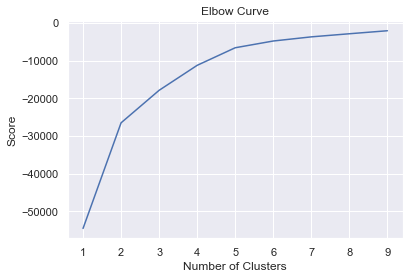

In [6]:
#Elbow curve for finding optimum number of clusters

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df1[['lat']]
X_axis = df1[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize


plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')

# Computing k-means clustering.

kmeans.fit(df1[df1.columns[1:3]]) # Computing k-means clustering.
df1['cluster_label'] = kmeans.fit_predict(df1[df1.columns[1:3]])

# Coordinates of cluster centers.

centers = kmeans.cluster_centers_ 

# Labels of each point

labels = kmeans.predict(df1[df1.columns[1:3]]) 
df1.head(10)

,id,lat,lng,cluster_label
0,vipin-kumar-2,28.309124,76.864332,0
1,daya-,28.490826,77.069009,0
2,mukesh-3,28.501504,77.032206,0
3,neyaz-ahmed,28.512438,77.022588,0
4,pawan-kumar-2,28.532572,77.053045,0
5,bhupendra,28.510925,77.025823,0
6,sarfaraz,28.514697,77.034885,0
7,suman-1,28.458850,77.019743,0
8,rajnish,28.537562,77.054748,0
9,mukesh-jha,28.501504,77.032206,0


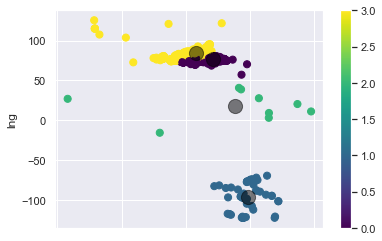

In [24]:
#Visualizing the result

df1.plot.scatter(x = 'lat', y = 'lng', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [25]:
#Finding centres of the region

centers = kmeans.cluster_centers_
print(centers)

[[ 28.44196087  77.0389055 ]
 [ 39.31015392 -95.91264035]
 [ 35.19472022  18.07881529]
 [ 23.20948455  84.23949668]]
